# Table of content:

### Introduction 

The dataset has 16 columns which are:

                                        ID
                                        Price: price of the car(Target Column)
                                        Levy
                                        Manufacturer
                                        Model
                                        Prod. year
                                        Category
                                        Leather interior
                                        Fuel type
                                        Engine volume
                                        Mileage
                                        Cylinders
                                        Gear box type
                                        Drive wheels
                                        Doors
                                        Wheel
                                        Color
                                        Airbags

In [644]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
import plotly.express as px
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import time
import warnings
warnings.filterwarnings(action='ignore')

## EDA

In [645]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car_price_prediction.csv')

#### Understanding the data

In [646]:
data.head()

ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4

In [647]:
data.shape

(19237, 18)

In [648]:
data.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [649]:
data.describe()

ID         Price    Prod. year     Cylinders       Airbags
count  1.923700e+04  1.923700e+04  19237.000000  19237.000000  19237.000000
mean   4.557654e+07  1.855593e+04   2010.912824      4.582991      6.582627
std    9.365914e+05  1.905813e+05      5.668673      1.199933      4.320168
min    2.074688e+07  1.000000e+00   1939.000000      1.000000      0.000000
25%    4.569837e+07  5.331000e+03   2009.000000      4.000000      4.000000
50%    4.577231e+07  1.317200e+04   2012.000000      4.000000      6.000000
75%    4.580204e+07  2.207500e+04   2015.000000      4.000000     12.000000
max    4.581665e+07  2.630750e+07   2020.000000     16.000000     16.000000

In [650]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

##### Types of feature present in the dataset

In [651]:
cat_feature=[feature for feature in data.columns if data[feature].dtype=='O']
print(cat_feature)

['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']


In [652]:
num_feature=[feature for feature in data.columns if data[feature].dtype!='O']
print(num_feature)

['ID', 'Price', 'Prod. year', 'Cylinders', 'Airbags']


### Cleaning the data

#### Checking for null values

In [653]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

#### Checking for duplicated values

In [654]:
data.ID.duplicated().sum()

313

In [655]:
data.drop_duplicates(inplace=True)

#### Cleaning the noisy values in the features 

##### Levy

In [656]:
data.Levy.value_counts()

-       5709
765      482
891      453
639      403
640      398
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

In [657]:
data['Levy'] = data['Levy'].replace(['-'],['0'])
data['Levy'] = data['Levy'].astype(str).astype(int)
data.Levy.value_counts()

0       5709
765      482
891      453
639      403
640      398
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

In [658]:
data.Manufacturer.unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [659]:
data['Manufacturer'].value_counts()

HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: Manufacturer, Length: 65, dtype: int64

### *Feature Engineering*

In [660]:
data['Age'] = 2022 - data['Prod. year']

Add Age For each Cars

In [661]:
data['engine_turbo'] = np.where(data['Engine volume'].str.contains('Turbo'), 1, 0)

Some Engine volume has word turbo and and this type of engine make it more power

##### Engine volume

In [662]:
data['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

>The presence of 'Turbo' leads to the entire column being declared of datatype 'object'.

In [663]:
data['Engine volume']=data['Engine volume'].str.replace('Turbo','')
data['Engine volume']= data['Engine volume'].astype(str).astype(float)

In [664]:
data['Engine volume'].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

##### Mileage

In [665]:
data['Mileage']

0        186005 km
1        192000 km
2        200000 km
3        168966 km
4         91901 km
           ...    
19232    300000 km
19233    161600 km
19234    116365 km
19235     51258 km
19236    186923 km
Name: Mileage, Length: 18924, dtype: object

> removing km will be good to converting it to int

In [666]:
data['Mileage'] = data['Mileage'].apply(lambda x : str(x).replace("km"," "))
data['Mileage'] = data['Mileage'].astype(str).astype(int)

In [667]:
data['Mileage'].head()

0    186005
1    192000
2    200000
3    168966
4     91901
Name: Mileage, dtype: int64

##### Doors

In [668]:
data['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

> removing -may , -mar to appear as no. of doors not like a date 

In [669]:
data['Doors'] = data['Doors'].str.replace('4-May','4')
data['Doors'] = data['Doors'].str.replace('2-Mar','2')

In [670]:
data['Doors'].head()

0    04
1    04
2    04
3    04
4    04
Name: Doors, dtype: object

In [671]:
data['Doors'].unique()

array(['04', '02', '>5'], dtype=object)

In [672]:
data['Wheel'].unique()

array(['Left wheel', 'Right-hand drive'], dtype=object)

In [673]:
data1=data

In [674]:
num_feature

['ID', 'Price', 'Prod. year', 'Cylinders', 'Airbags']

In [675]:
cat_feature

['Levy',
 'Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Mileage',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color']

In [676]:
data[data['Price']<=500]

ID  Price  Levy   Manufacturer       Model  Prod. year  \
27     45804684     30     0         TOYOTA       Prius        2008   
33     45770026    125  1750         TOYOTA  Highlander        2008   
39     45661296    314  1399          LEXUS      RX 450        2010   
45     45769564    220  1194         TOYOTA      Tacoma        2013   
53     45769316    392  1017  MERCEDES-BENZ       E 300        2017   
...         ...    ...   ...            ...         ...         ...   
19215  45763841    470   831        HYUNDAI     Elantra        2017   
19218  45748699     30     0         NISSAN        Note        2006   
19229  39977395     50     0         TOYOTA       Prius        2008   
19230  45760891    470   645         TOYOTA       Prius        2011   
19236  45813273    470   753        HYUNDAI      Sonata        2012   

        Category Leather interior Fuel type  Engine volume  Mileage  \
27         Sedan               No    Hybrid            1.5   169000   
33         Sedan              Yes    Hybrid            3.3   287274   
39          Jeep              Yes    Hybrid            3.5   382746   
45          Jeep              Yes    Petrol            4.0   239342   
53         Sedan              Yes    Petrol            2.0     1600   
...          ...              ...       ...            ...      ...   
19215      Sedan              Yes    Petrol            1.6    25635   
19218  Hatchback               No    Petrol            1.3        0   
19229  Hatchback               No    Hybrid            1.5   150000   
19230  Hatchback              Yes    Hybrid            1.8   307325   
19236      Sedan              Yes    Hybrid            2.4   186923   

       Cylinders Gear box type Drive wheels Doors             Wheel   Color  \
27           4.0     Automatic        Front    04        Left wheel   White   
33           6.0     Automatic          4x4    04        Left wheel   White   
39           6.0     Automatic          4x4    04        Left wheel  Silver   
45           6.0     Automatic          4x4    04        Left wheel  Silver   
53           4.0     Automatic         Rear    04        Left wheel   Black   
...          ...           ...          ...   ...               ...     ...   
19215        4.0     Automatic        Front    04        Left wheel   Black   
19218        4.0     Automatic        Front    04  Right-hand drive   Green   
19229        4.0     Automatic        Front    04        Left wheel  Silver   
19230        4.0     Automatic        Front    04        Left wheel  Silver   
19236        4.0     Automatic        Front    04        Left wheel   White   

       Airbags  Age  engine_turbo  
27           8   14             0  
33          12   14             0  
39          12   12             0  
45          12    9             0  
53          12    5             0  
...        ...  ...           ...  
19215       12    5             0  
19218        9   16             0  
19229        6   14             0  
19230       12   11             0  
19236       12   10             0  

[1635 rows x 20 columns]

**Most Cars Under 500$ in price has age less than 20 and this non realistice values**

In [677]:
data = data[data['Price']>=500]

In [678]:
data['Price'].min()

500

###Handle Outliers with Two Method

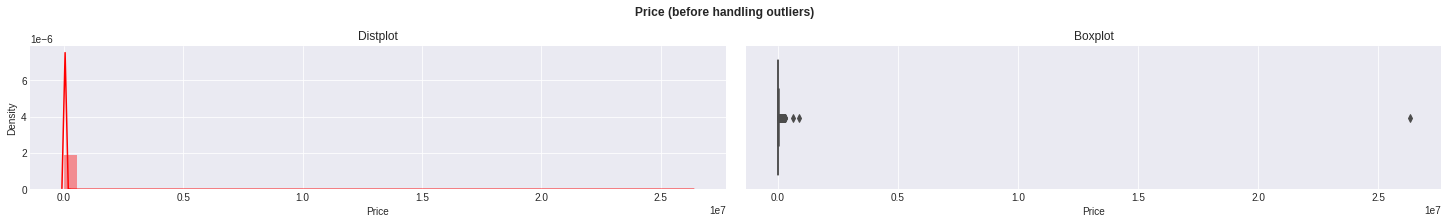

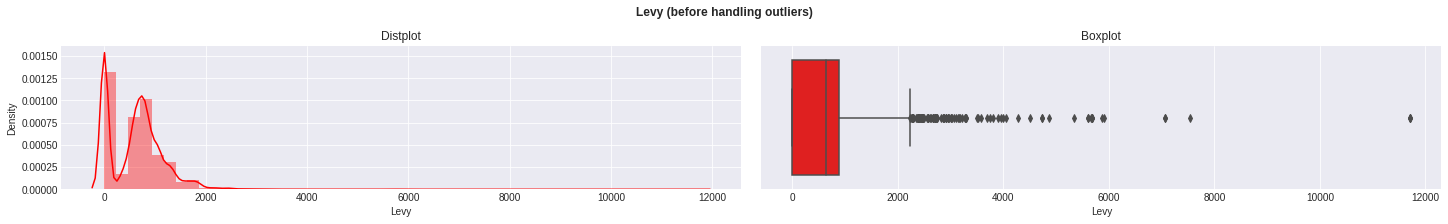

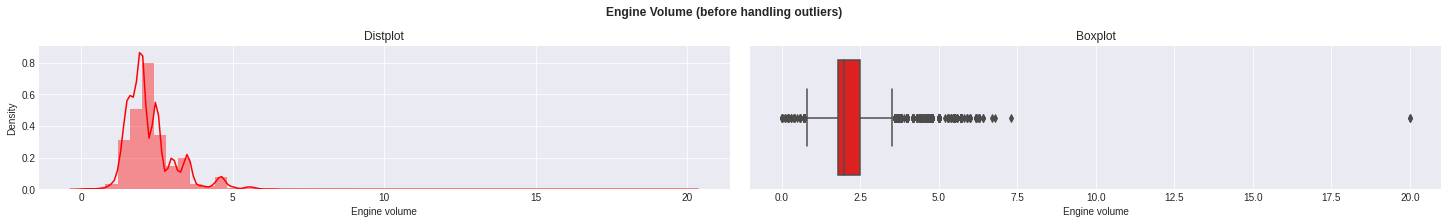

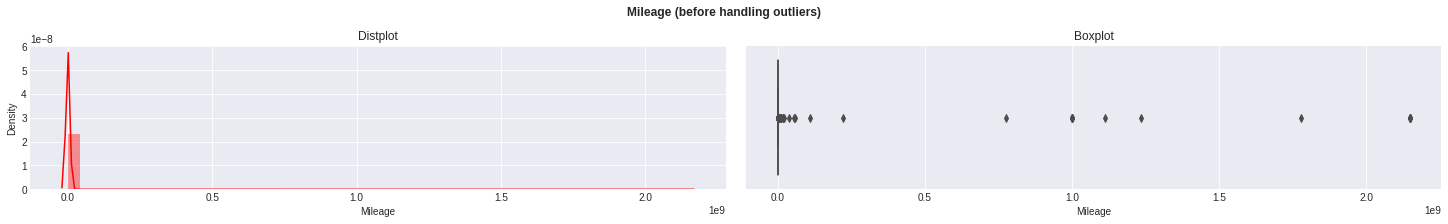

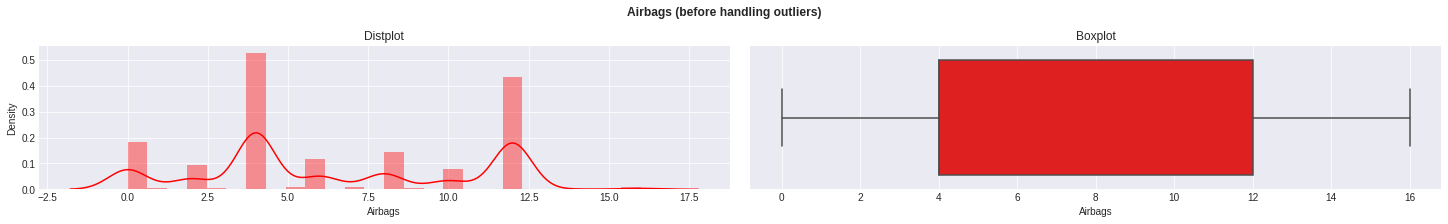

In [679]:
cont_col = ['Price', 'Levy',  'Engine volume', 'Mileage', 'Airbags']
for col in cont_col:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 3)
    sns.distplot(data[col], ax=ax[0],color='red').set(title="Distplot")
    sns.boxplot(data[col], ax=ax[1],color='red').set(title="Boxplot")
    plt.suptitle(f'{col.title()} (before handling outliers)',weight='bold')
    fig.show()

In [680]:
data[cont_col].describe()

Price          Levy  Engine volume       Mileage       Airbags
count  1.729100e+04  17291.000000   17291.000000  1.729100e+04  17291.000000
mean   2.031866e+04    620.695448       2.286016  1.497552e+06      6.469319
std    2.009179e+05    564.832773       0.858156  4.763244e+07      4.203791
min    5.000000e+02      0.000000       0.000000  0.000000e+00      0.000000
25%    7.683000e+03      0.000000       1.800000  7.002350e+04      4.000000
50%    1.442600e+04    642.000000       2.000000  1.249120e+05      4.000000
75%    2.352100e+04    891.000000       2.500000  1.853180e+05     12.000000
max    2.630750e+07  11714.000000      20.000000  2.147484e+09     16.000000

### Method one

In [681]:
def outlier_prcnt(data, col_list):
    for col_name in col_list:
        q1 = data[col_name].quantile(0.25)
        q3 = data[col_name].quantile(0.75)
        iqr = q3-q1  #IQR
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr

        
        outliers = ((data[col_name] > fence_high) | (data[col_name] < fence_low)).sum()
        total = data[col_name].shape[0]
        print(f"Total outliers in {col_name} are: {outliers} - {round(100*(outliers)/total,2)}%.")

outlier_prcnt(data, cont_col)

Total outliers in Price are: 1043 - 6.03%.
Total outliers in Levy are: 133 - 0.77%.
Total outliers in Engine volume are: 1172 - 6.78%.
Total outliers in Mileage are: 626 - 3.62%.
Total outliers in Airbags are: 0 - 0.0%.


In [682]:
def outlier_handle(data, col_list):
    df_new = data.copy()
    for col_name in col_list:
        q1 = data[col_name].quantile(0.25)
        q3 = data[col_name].quantile(0.75)
        iqr = q3-q1  #IQR
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_new.loc[:,  col_name] = np.where(data[col_name]> fence_high, fence_high,
                                         np.where(data[col_name]< fence_low, fence_low,
                                                  data[col_name]))
    return df_new
data = outlier_handle(data, cont_col)

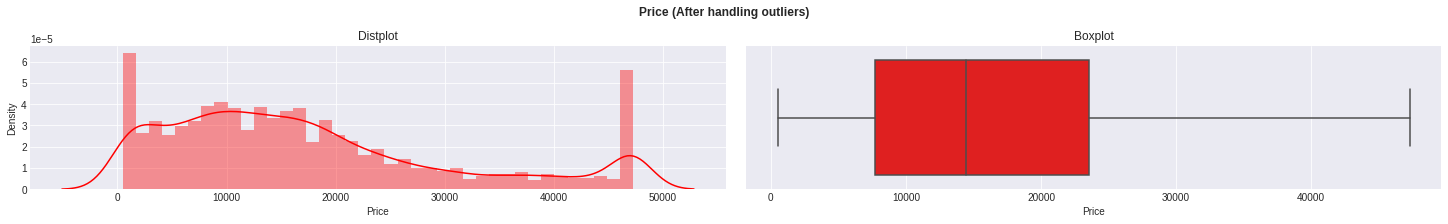

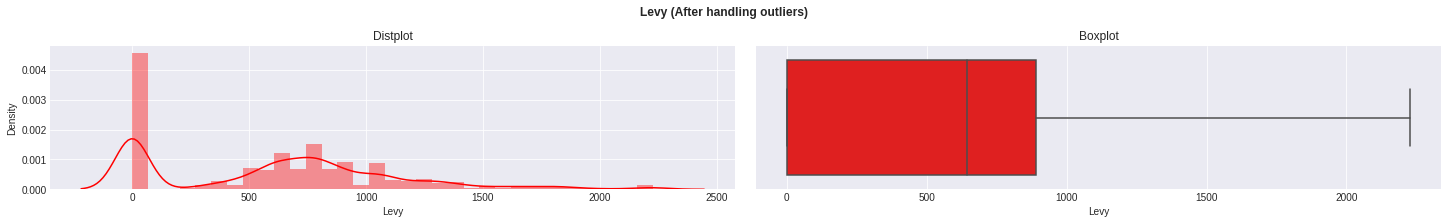

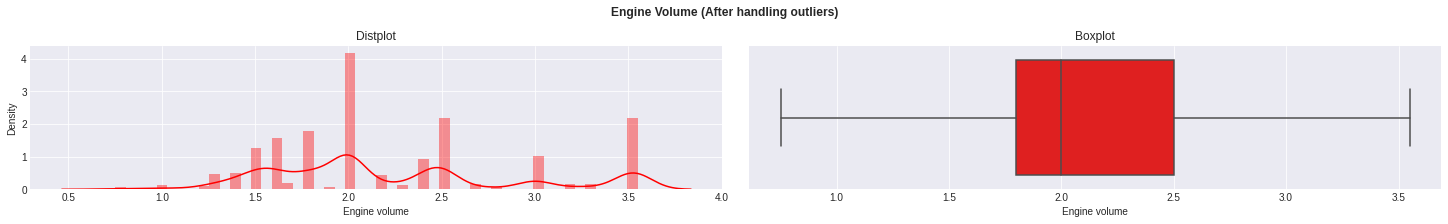

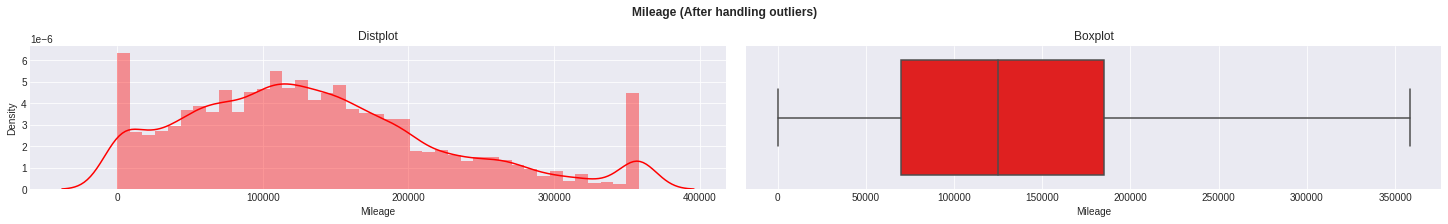

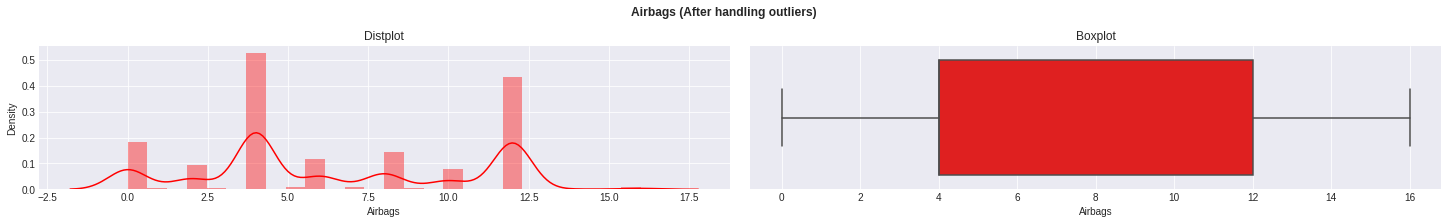

In [683]:
for col in cont_col:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 3)
    sns.distplot(data[col], ax=ax[0],color='red').set(title="Distplot")
    sns.boxplot(data[col], ax=ax[1],color='red').set(title="Boxplot")
    plt.suptitle(f'{col.title()} (After handling outliers)',weight='bold')
    fig.show()

In [684]:
data[cont_col].describe()

Price          Levy  Engine volume        Mileage       Airbags
count  17291.000000  17291.000000   17291.000000   17291.000000  17291.000000
mean   17369.804754    612.631109       2.222856  135600.786797      6.469319
std    13126.280631    512.430018       0.670708   88693.829106      4.203791
min      500.000000      0.000000       0.750000       0.000000      0.000000
25%     7683.000000      0.000000       1.800000   70023.500000      4.000000
50%    14426.000000    642.000000       2.000000  124912.000000      4.000000
75%    23521.000000    891.000000       2.500000  185318.000000     12.000000
max    47278.000000   2227.500000       3.550000  358259.750000     16.000000

In [685]:
fig = px.line(data, y='Price')
fig.show()

## Distribution of Category columns with Production Years 
### ***in each columns show the start of every characteristic and What it have reached in modern Years?***

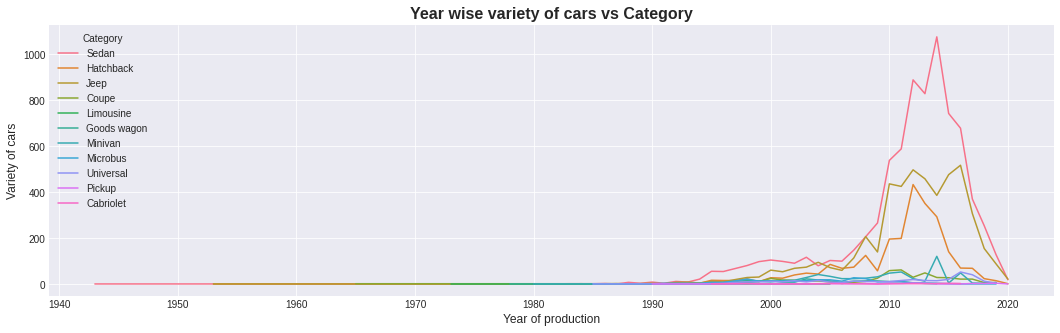

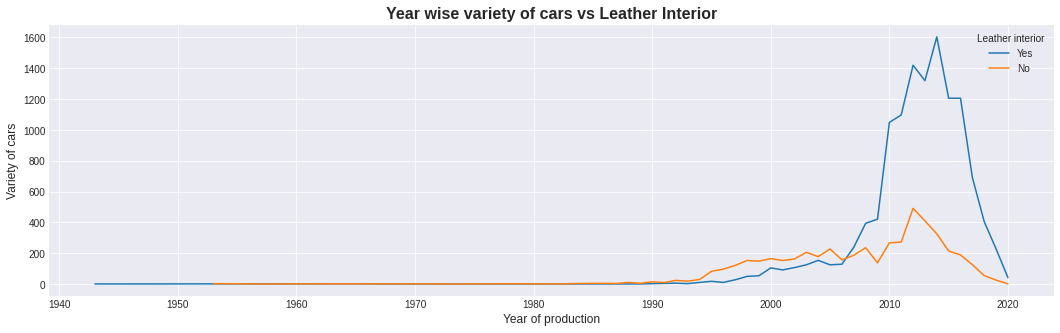

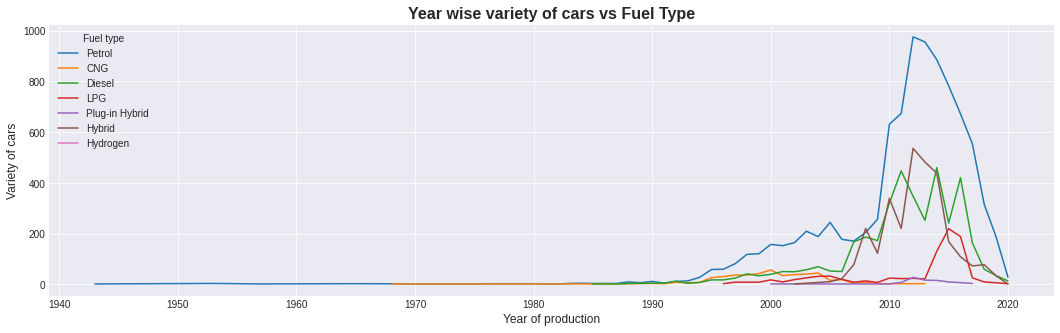

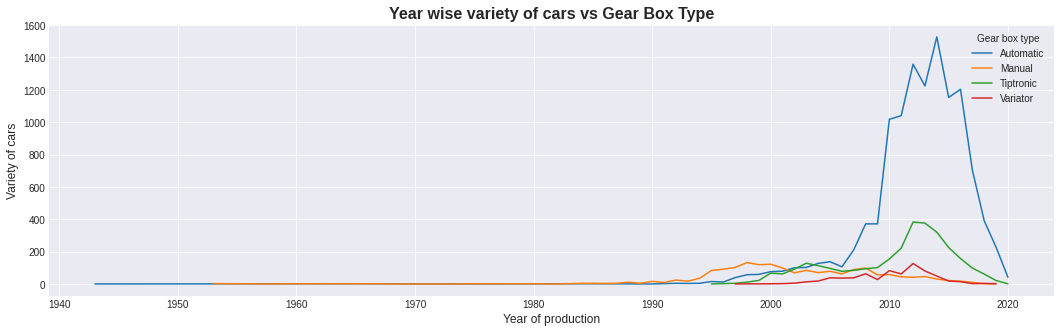

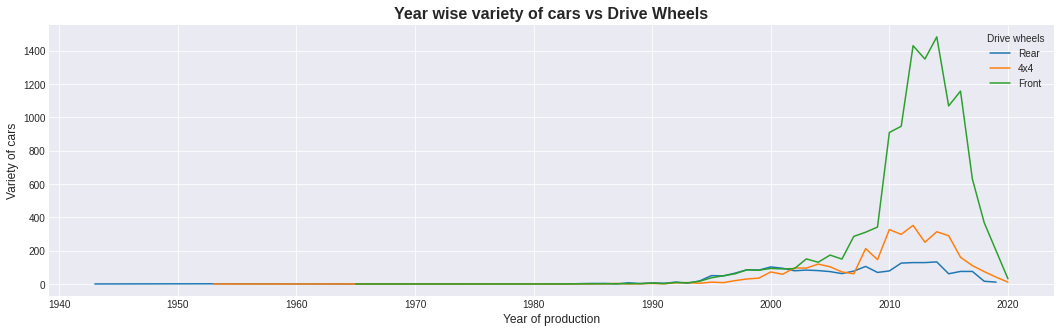

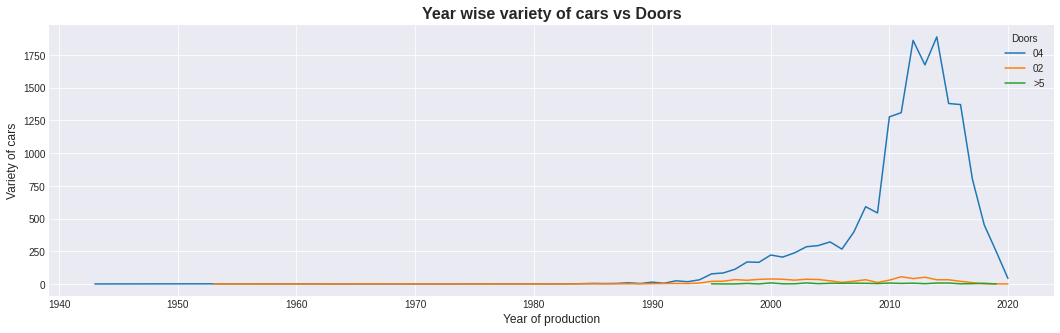

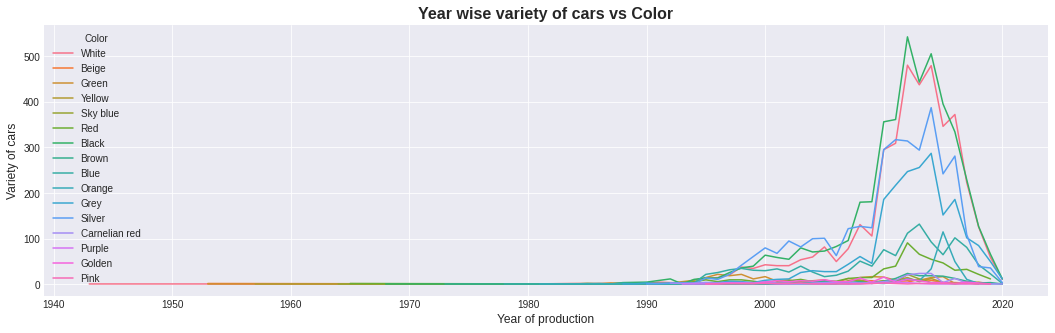

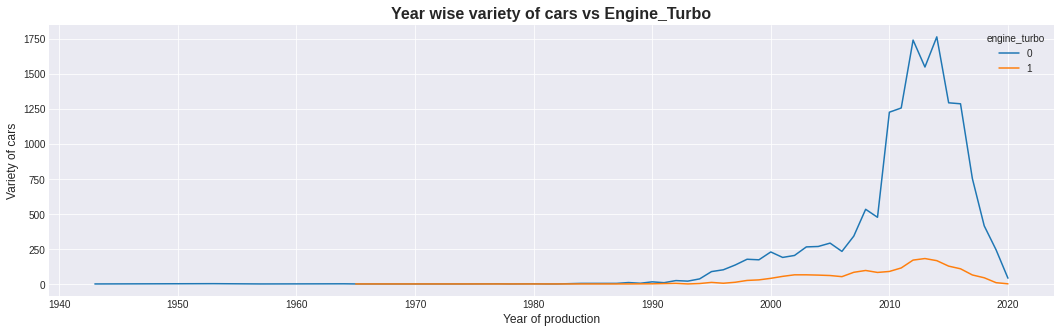

In [686]:
cat_col  = ['Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Color', 'engine_turbo']
for hue in cat_col:
    plt.figure(figsize=(18,5))
    df1 = data[['Prod. year',hue, 'Price']].groupby(by= ['Prod. year',hue], as_index=True).count().reset_index()
    plot = sns.lineplot(x = 'Prod. year', y = 'Price',  data = df1, hue = hue)
    plt.title(f'Year wise variety of cars vs {hue.title()}', fontsize=16,weight='bold')
    plt.xlabel('Year of production', fontsize=12)
    plt.ylabel('Variety of cars', fontsize=12)
    plt.show()

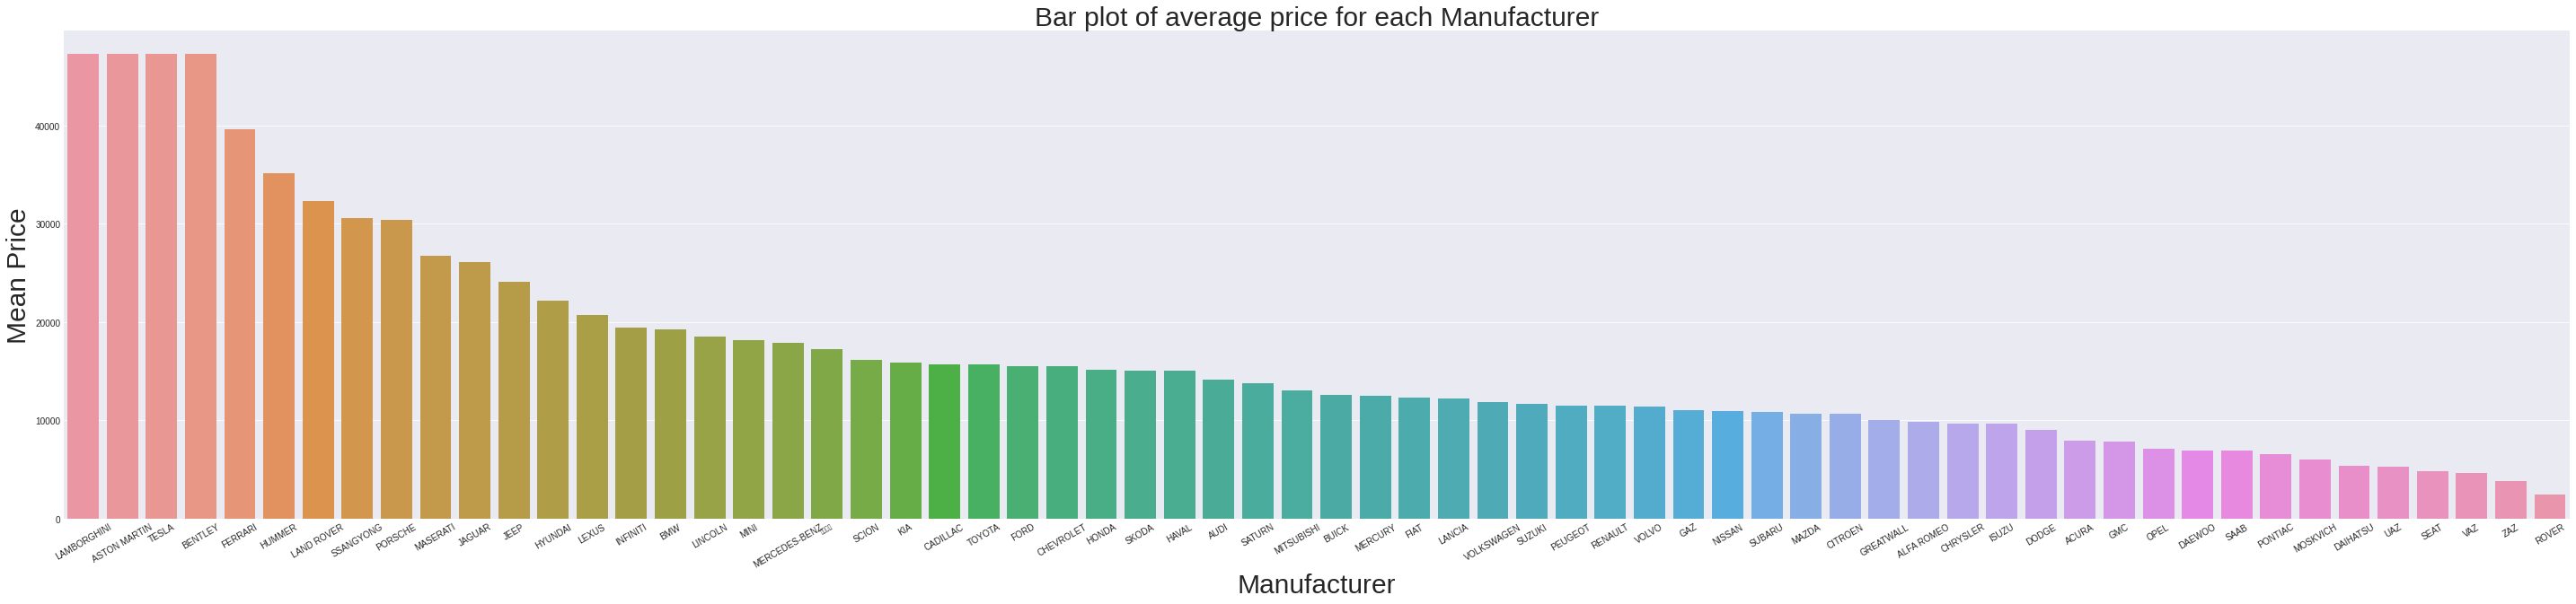

In [687]:
df1 = data[['Price', 'Manufacturer']].groupby(by= ['Manufacturer'], as_index=False).agg('mean').sort_values(by='Price', ascending=False)
plt.figure(figsize=(50,10))
plot = sns.barplot(x="Manufacturer", y="Price", data=df1)
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='center')
plt.title('Bar plot of average price for each Manufacturer', fontsize=30)
plt.xlabel('Manufacturer', fontsize=30)
plt.ylabel('Mean Price', fontsize=30)
plt.show()

#### Realtionship analysis

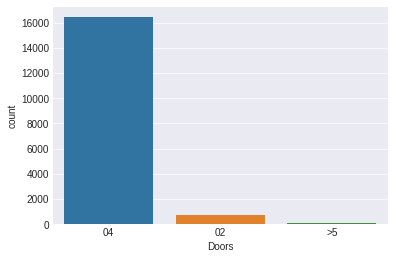

In [688]:
sns.countplot(data=data,  x= 'Doors')


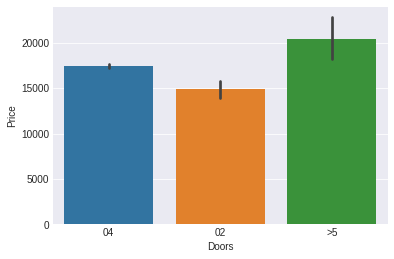

In [689]:
sns.barplot(data=data,y='Price',x='Doors')

In [690]:
cat_cols = data.select_dtypes(include='object').columns
cat_cols

Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')

In [691]:
for i in cat_cols:
        boxp = px.box(data_frame=data,x=i,y='Price')
        boxp.show()

In [692]:
fig = px.treemap(data_frame=data,path=["Manufacturer","Category","Model"],values='Price',title='MANUFACTURER DATA DISTRIBUTION:SALES DISTRIBUTION')
fig.show()

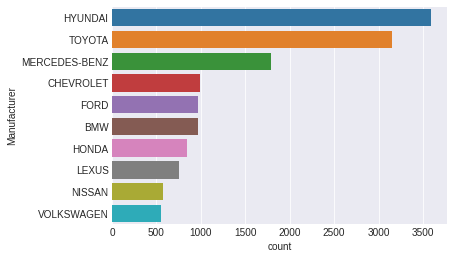

In [693]:
sns.countplot(y ='Manufacturer',data = data,order=data.Manufacturer.value_counts().iloc[:10].index )
plt.show()

Most Common Manufacturer of Cars

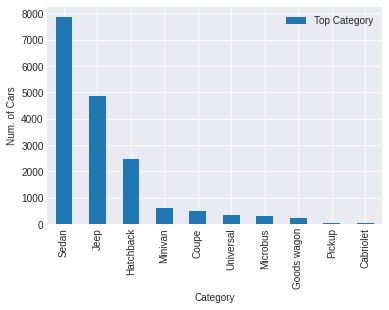

In [694]:
topCategory= data.groupby('Category')['Category'].count()
topCategory = pd.DataFrame(topCategory)
topCategory.columns = ['Top Category']
topCategory.sort_values(by=['Top Category'], inplace=True, ascending=False)
topCategory = topCategory.head(10)
topCategory.plot.bar();
plt.xlabel('Category')
plt.ylabel('Num. of Cars');

Most Common Category of Cars

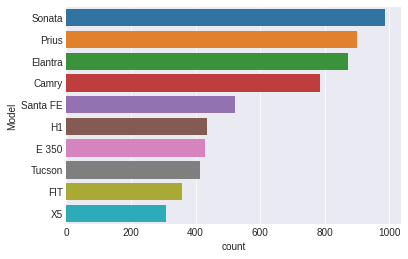

In [695]:
sns.countplot(y ='Model',data = data,order=data.Model.value_counts().iloc[:10].index )
plt.show()

Most Common Model of Cars

### Leather interior

In [696]:
interior_count=data['Leather interior'].value_counts()
interior_count

Yes    12348
No      4943
Name: Leather interior, dtype: int64

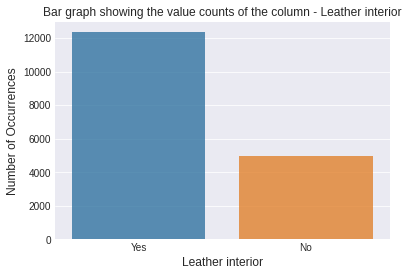

In [697]:
sns.barplot(interior_count.index, interior_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Leather interior')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Leather interior', fontsize = 12)
plt.show()

#### Mean Price for each Leather interior

  Leather interior         Price
0               No  13807.108032
1              Yes  18795.979835


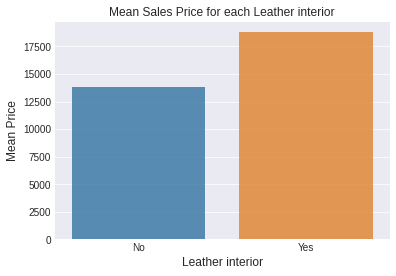

In [698]:
mean_price_interior = data[['Leather interior', 'Price']].groupby('Leather interior', as_index = False).mean()
print(mean_price_interior)
sns.barplot(mean_price_interior['Leather interior'], mean_price_interior['Price'], alpha = 0.8)
plt.title('Mean Sales Price for each Leather interior')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Leather interior', fontsize = 12)
plt.show()

### Fuel type

In [699]:
fuel_count = data['Fuel type'].value_counts(dropna = False)
fuel_count

Petrol            9135
Diesel            3815
Hybrid            2926
LPG                868
CNG                461
Plug-in Hybrid      85
Hydrogen             1
Name: Fuel type, dtype: int64

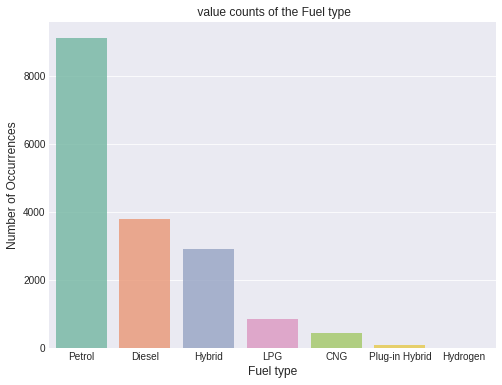

In [700]:
plt.figure(figsize = (8, 6))
sns.barplot(fuel_count.index, fuel_count.values, alpha = 0.8,palette='Set2')
plt.title(' value counts of the Fuel type')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Fuel type', fontsize = 12)
plt.show()

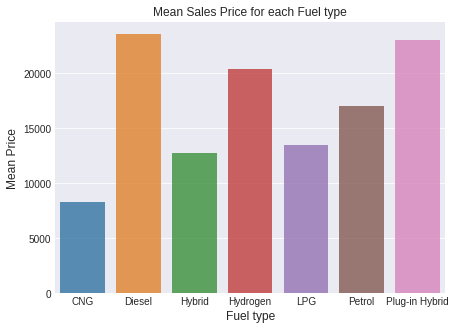

In [701]:
mean_price_fuel = data[['Fuel type', 'Price']].groupby('Fuel type', as_index = False).mean()
plt.figure(figsize = (7, 5))
sns.barplot(mean_price_fuel['Fuel type'], mean_price_fuel['Price'], alpha = 0.8)
plt.title('Mean Sales Price for each Fuel type')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Fuel type', fontsize = 12)
plt.show()

### Gear box type

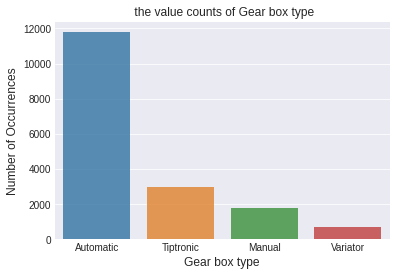

In [702]:
gear_count = data['Gear box type'].value_counts(dropna = False)
sns.barplot(gear_count.index, gear_count.values, alpha = 0.8)
plt.title(' the value counts of Gear box type')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Gear box type', fontsize = 12)
plt.show()

#### Mean Price for each Gear box type

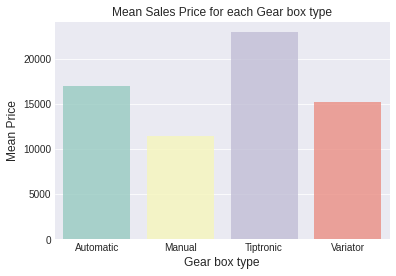

In [703]:
mean_price_gear = data[['Gear box type', 'Price']].groupby('Gear box type', as_index = False).mean()
sns.barplot(mean_price_gear['Gear box type'], mean_price_gear['Price'], alpha = 0.8,palette='Set3')
plt.title('Mean Sales Price for each Gear box type')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Gear box type', fontsize = 12)
plt.show()

### Drive wheels

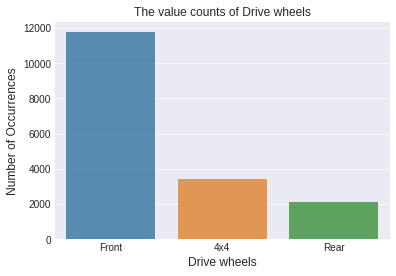

In [704]:
drive_count = data['Drive wheels'].value_counts(dropna = False)
sns.barplot(drive_count.index, drive_count.values, alpha = 0.8)
plt.title('The value counts of Drive wheels')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Drive wheels', fontsize = 12)
plt.show()

#### Mean price per each Drive wheels


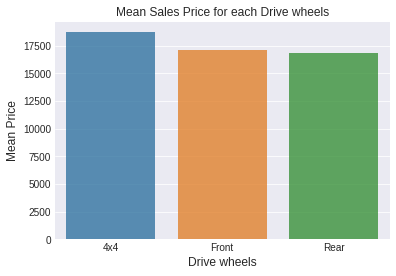

In [705]:
mean_price_drive = data[['Drive wheels', 'Price']].groupby('Drive wheels', as_index = False).mean()
sns.barplot(mean_price_drive['Drive wheels'], mean_price_drive['Price'], alpha = 0.8)
plt.title('Mean Sales Price for each Drive wheels')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Drive wheels', fontsize = 12)
plt.show()

### Color

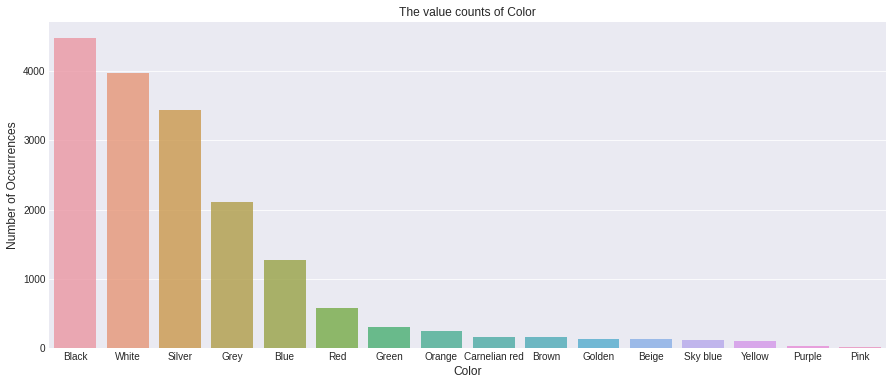

In [706]:
color_count = data['Color'].value_counts(dropna = False)
plt.figure(figsize = (15, 6))
sns.barplot(color_count.index, color_count.values, alpha = 0.8)
plt.title('The value counts of Color')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Color', fontsize = 12)
plt.show()

#### Mean price per each Color


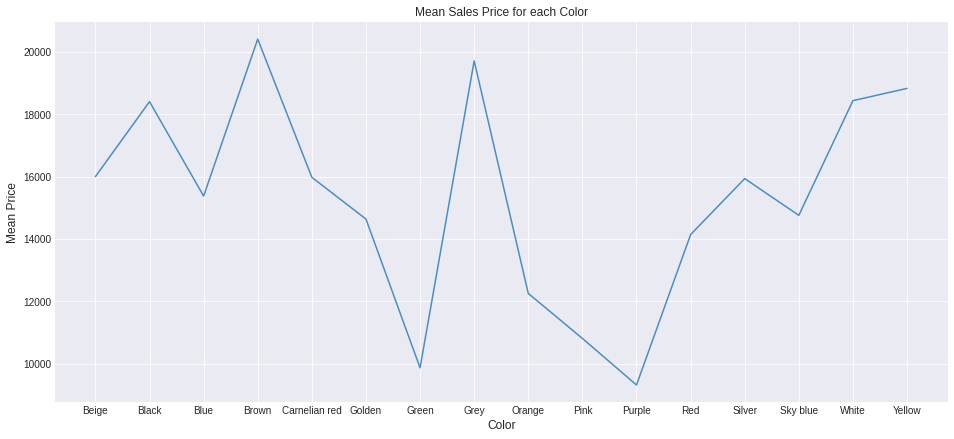

In [707]:
mean_price_color = data[['Color', 'Price']].groupby('Color', as_index = False).mean()
plt.figure(figsize = (16, 7))
sns.lineplot(mean_price_color['Color'], mean_price_color['Price'], alpha = 0.8)
plt.title('Mean Sales Price for each Color')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Color', fontsize = 12)
plt.show()

## Distribution of Category columns with Production Years 

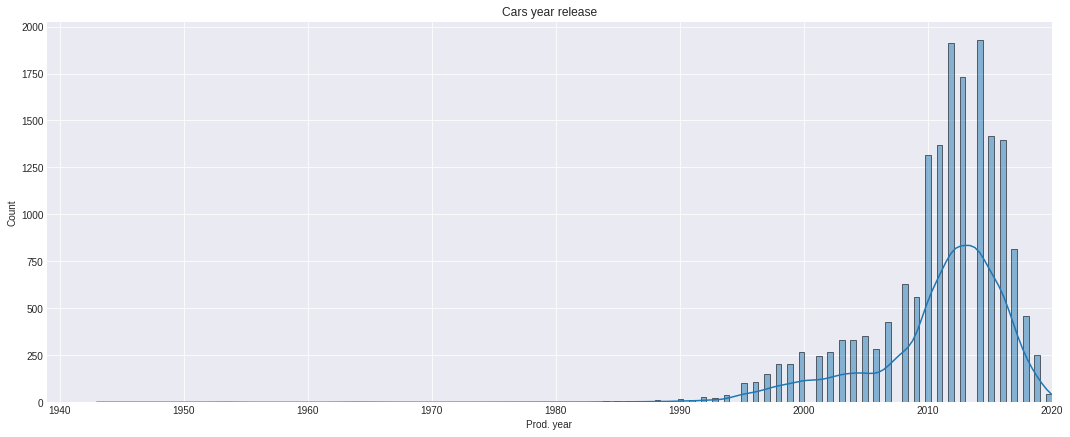

In [708]:
f, ax = plt.subplots(figsize=(18, 7))
sns.histplot(data=data, x="Prod. year",kde=True)
ax.set_xlim(1939,2020)
plt.title('Cars year release')
plt.show()

Highest Production Years of cars between 2014 and 2017

Affect Of age on Price of cars

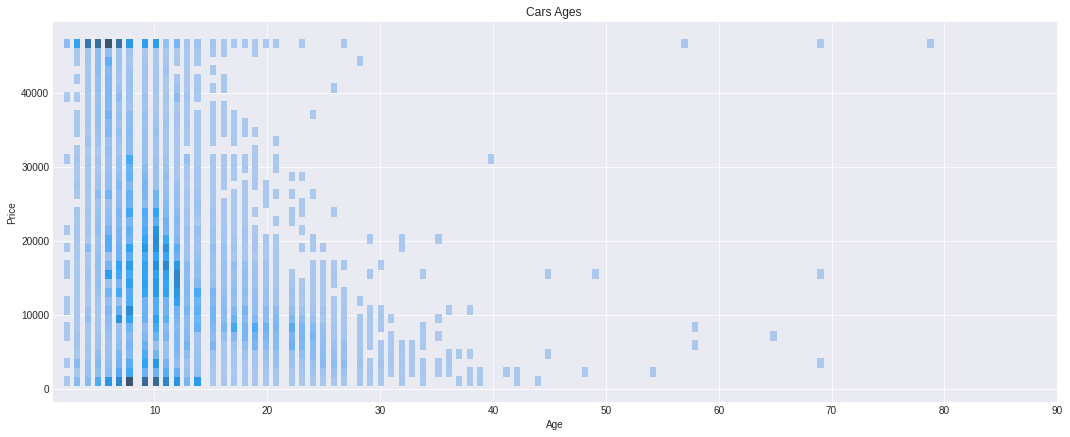

In [709]:
f, ax = plt.subplots(figsize=(18, 7))
sns.histplot(data=data, x="Age",y='Price')
ax.set_xlim(1,90)
plt.title('Cars Ages ')
plt.show()

#### Dropping unnecessary columns

In [710]:
data.drop(['ID','Color'], axis = 1, inplace = True)

### Affect of Handeling outliers wiht IQR on Skewness of price columns

Text(0.5, 1.0, 'Distribution of the column - Price')

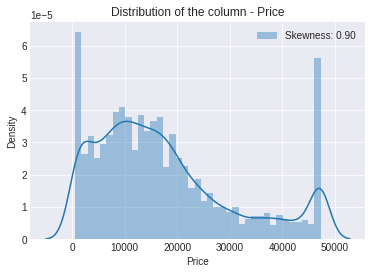

In [711]:
sns.distplot(data['Price'], label = 'Skewness: %.2f'%(data['Price'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Price')

### Encoding

In [712]:
from sklearn.preprocessing import LabelEncoder
Manufacturer_le = LabelEncoder()
Model_le = LabelEncoder()
Category_le = LabelEncoder()
Leather_interior_le = LabelEncoder()
Fuel_type_le = LabelEncoder()
Gear_box_type_le = LabelEncoder()
Doors_le  = LabelEncoder()
Wheel_le  = LabelEncoder() 
Drive_wheels_le = LabelEncoder() 
color_le = LabelEncoder()                                             

In [713]:
data['Manufacturer'] = Manufacturer_le.fit_transform(data['Manufacturer'])
data['Model'] = Model_le.fit_transform(data['Model'])
data['Category'] = Category_le.fit_transform(data['Category'])
data['Leather interior'] = Leather_interior_le.fit_transform(data['Leather interior'])
data['Fuel type'] = Fuel_type_le.fit_transform(data['Fuel type'])
data['Gear box type'] = Gear_box_type_le.fit_transform(data['Gear box type'])
data['Doors'] = Doors_le.fit_transform(data['Doors'])
data['Wheel'] = Wheel_le.fit_transform(data['Wheel'])
data['Drive wheels'] = Drive_wheels_le.fit_transform(data['Drive wheels'])

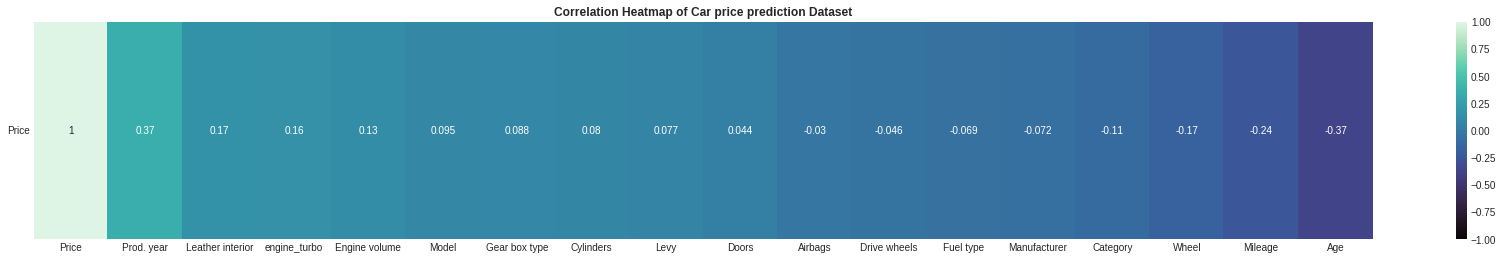

In [714]:
Target_corr  = data.corr().loc[:, 'Price'].to_frame().sort_values(by = 'Price' , ascending=False).T
plt.figure(figsize=(30,4))
plot = sns.heatmap(Target_corr, annot=True, cmap='mako', vmin = -1)
plt.title('Correlation Heatmap of Car price prediction Dataset', weight='bold')
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='center')
plot.set_yticklabels(plot.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.show()

## Modelling

#### Splitting the data to Training and Test 

In [715]:
X = data.drop('Price',axis=1).values
Y = data['Price'].values

In [716]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size= 0.25 ,random_state=42)

##### Now Scale the data using MinMaxScaler

In [717]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

In [718]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

LinearRegression()

In [719]:
y_pred = linear_regressor.predict(x_test)
LR = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
LR.head()

y_test   y_pred
0    784.0  10439.0
1  47278.0  25824.0
2    941.0  12064.0
3  17876.0  14322.0
4  47278.0  31386.0

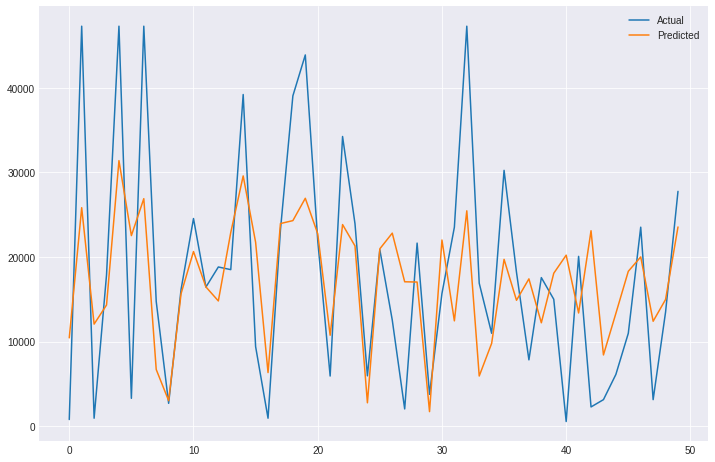

In [720]:
plt.figure(figsize=(12,8))
plt.plot(LR[:50])
plt.legend(['Actual' , 'Predicted'])

In [721]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 8516.716
Mean Squared Error of the model is : 121115492.953
Root Mean Squared Error of the model is : 11005.248
R-squared value of the model is : 0.327


In [722]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor(n_neighbors=8)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [723]:
y_pred = knn.predict(x_test)
y_pred = knn.predict(x_test)
kn= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
kn.head()

y_test     y_pred
0    784.0   1881.750
1  47278.0  47278.000
2    941.0   4557.125
3  17876.0  16347.125
4  47278.0  38415.250

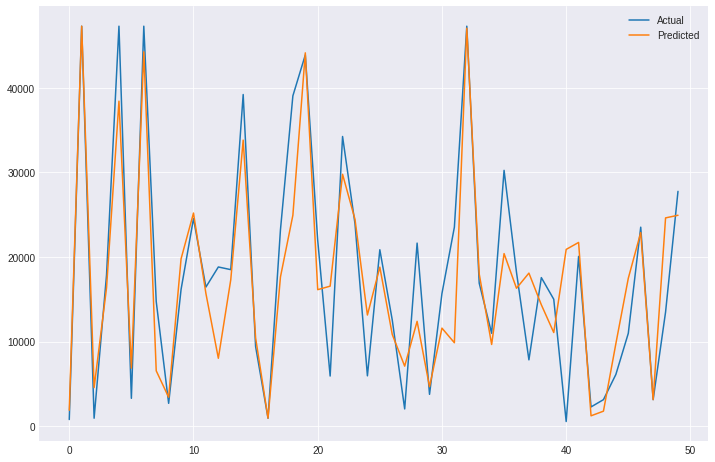

In [724]:
plt.figure(figsize=(12,8))
plt.plot(kn[:50])
plt.legend(['Actual' , 'Predicted'])

In [725]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 4763.011
Mean Squared Error of the model is : 53870808.422
Root Mean Squared Error of the model is : 7339.674
R-squared value of the model is : 0.701


In [726]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=380,learning_rate=0.4,random_state=1)
gbr.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.4, n_estimators=380, random_state=1)

In [727]:
y_pred = gbr.predict(x_test)
y_pred = gbr.predict(x_test)
gbx= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
gbx.head()

y_test        y_pred
0    784.0   2913.723924
1  47278.0  45117.551508
2    941.0   1942.037539
3  17876.0  16004.054133
4  47278.0  43634.229754

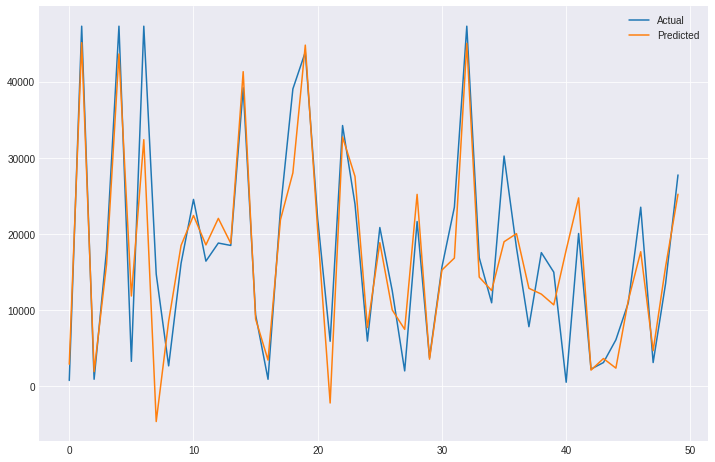

In [728]:
plt.figure(figsize=(12,8))
plt.plot(gbx[:50])
plt.legend(['Actual' , 'Predicted'])

In [729]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 4210.52
Mean Squared Error of the model is : 38691140.888
Root Mean Squared Error of the model is : 6220.22
R-squared value of the model is : 0.785


In [730]:
from sklearn.ensemble import RandomForestRegressor
Rf = RandomForestRegressor(n_estimators = 400,max_depth=15, max_features='log2',random_state=1)
Rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, max_features='log2', n_estimators=400,
                      random_state=1)

In [731]:
y_pred = Rf.predict(x_test)
y_pred = Rf.predict(x_test)
rf= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
rf.head()

y_test        y_pred
0    784.0   4661.299732
1  47278.0  45774.628392
2    941.0   5588.316051
3  17876.0  14999.456946
4  47278.0  39767.648118

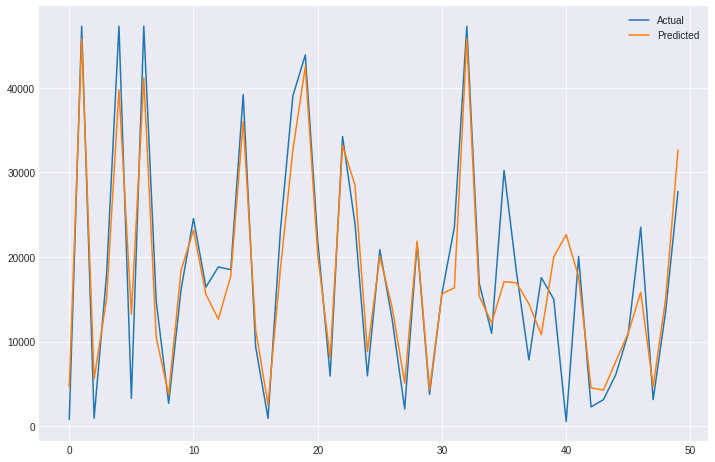

In [732]:
plt.figure(figsize=(12,8))
plt.plot(rf[:50])
plt.legend(['Actual' , 'Predicted'])

In [733]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 3839.488
Mean Squared Error of the model is : 32896250.914
Root Mean Squared Error of the model is : 5735.525
R-squared value of the model is : 0.817


In [734]:
from xgboost import XGBRegressor
xg = XGBRegressor(objective ='reg:linear',max_depth=7,n_estimators = 260,random_state=1)
xg.fit(x_train, y_train)

[14:23:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=7, n_estimators=260, random_state=1)

In [735]:
y_pred = xg.predict(x_test)
y_pred = xg.predict(x_test)
gx= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
gx.head()

y_test        y_pred
0    784.0   2797.184570
1  47278.0  45670.917969
2    941.0   3865.462158
3  17876.0  15959.712891
4  47278.0  45597.593750

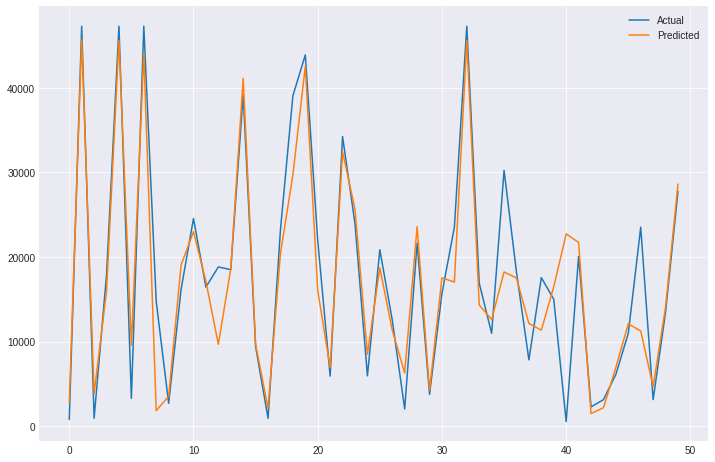

In [736]:
plt.figure(figsize=(12,8))
plt.plot(gx[:50])
plt.legend(['Actual' , 'Predicted'])

In [737]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 3571.157
Mean Squared Error of the model is : 29853362.304
Root Mean Squared Error of the model is : 5463.823
R-squared value of the model is : 0.834


In [743]:
models= [LinearRegression(),
         KNeighborsRegressor(n_neighbors=8),GradientBoostingRegressor(n_estimators=380,learning_rate=0.4,random_state=1),
         RandomForestRegressor(n_estimators = 400,max_depth=15, max_features='log2',random_state=1),
         XGBRegressor(objective ='reg:linear',max_depth=7,n_estimators = 260,random_state=1)]
scores= []
test_score = []
train_score=[]
train_times = []
names= []

In [744]:
for model in models:
    start= time.time()
    scores.append(cross_val_score(model, x_train, y_train, scoring= 'r2', cv= 5).mean())
    end = time.time()
    train_times.append(end-start)
    names.append(model.__class__.__name__)

df= pd.DataFrame(scores, columns=['Score With Cross-Validation'], index= range(len(models)))
df.insert(1, 'Time', pd.Series(train_times))
df.insert(0, 'Model', pd.Series(names))

[14:27:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:27:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:27:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:27:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:27:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [745]:
for model in models:
    model.fit(x_train, y_train)
    score1=model.score(x_train, y_train)
    train_score.append(score1)    
    score2=model.score(x_test, y_test)
    test_score.append(score2)    
df['Test_Score'] = test_score
df['Train_Score'] = train_score

[14:27:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


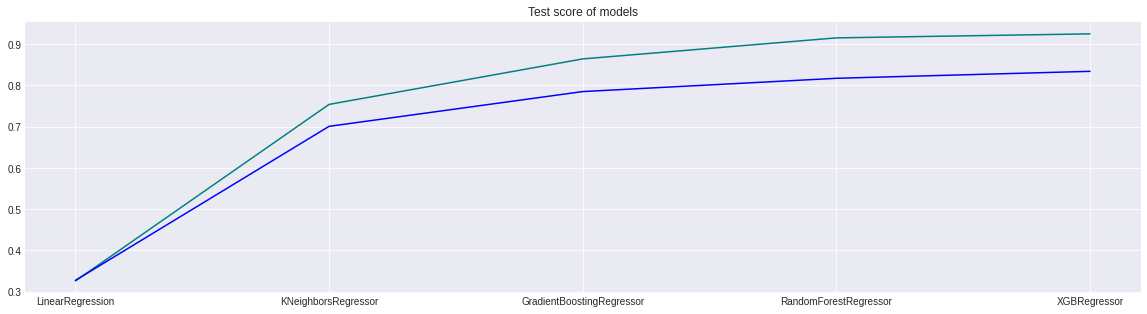

In [746]:
plt.figure(figsize=(20,5))
plt.plot(df['Model'],df['Train_Score'], color='teal')
plt.plot(df['Model'],df['Test_Score'], color='blue')
plt.title('Test score of models')
plt.show();

In [747]:
df

Model  Score With Cross-Validation       Time  \
0           LinearRegression                     0.323652   0.227273   
1        KNeighborsRegressor                     0.653500   7.151798   
2  GradientBoostingRegressor                     0.760879  26.599087   
3      RandomForestRegressor                     0.790486  22.844100   
4               XGBRegressor                     0.800108  17.864648   

   Test_Score  Train_Score  
0    0.327156     0.325709  
1    0.700726     0.753923  
2    0.785055     0.864263  
3    0.817248     0.915299  
4    0.834153     0.925064